# Objective: Analyze a Network of Employees and determine the relationship between friendship and movie preference

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])

In [2]:
def plot_graph(G, weight_name=None):   
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Step 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function returns a networkx graph with 19 nodes and 24 edges*

<IPython.core.display.Javascript object>


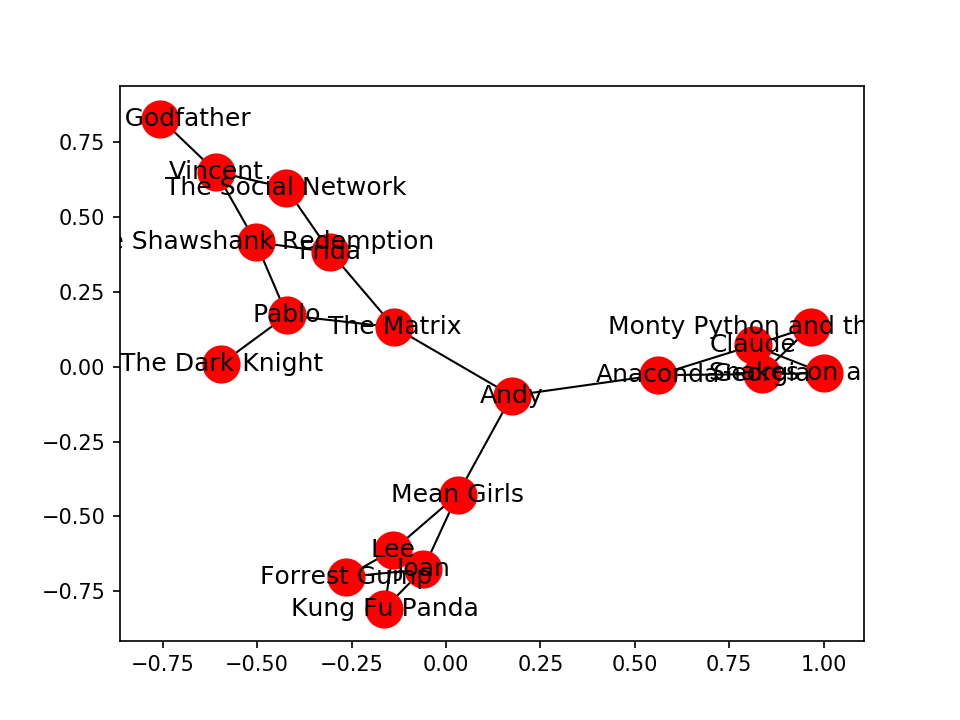

In [3]:
def step_one():
        
    #load in the bitartite graph
    movie_choices = nx.read_edgelist('Employee_Movie_Choices.txt', delimiter="\t")
    
    return movie_choices
plot_graph(step_one())

### Step 2

Using the graph from Step 1, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function returns a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

<IPython.core.display.Javascript object>


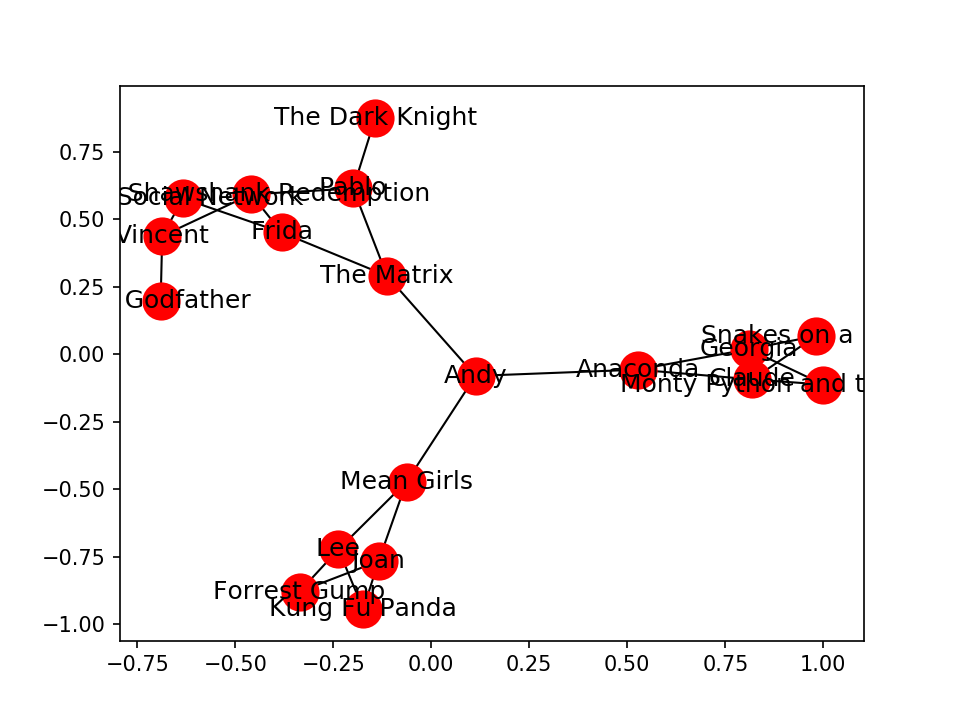

In [4]:
def step_two():
    #load the bitartite graph from step 1
    B = step_one()

    #loop through all the nodes in the bitartite graph
    for node in B.nodes():
    #if the node is the employee list, add the node attribute type = employee
        if node in employees:
            B.add_node(node, type="employee")
        #if the node is not in the employee list(ergo in the movie list), add the node attribute type = movie
        else:
            B.add_node(node, type="movie")
    
    return B
plot_graph(step_two())

### Step 3

Find a weighted projection of the graph from `step_two` which tells us how many movies different pairs of employees have in common.

*This function returns a weighted projected graph.*

<IPython.core.display.Javascript object>


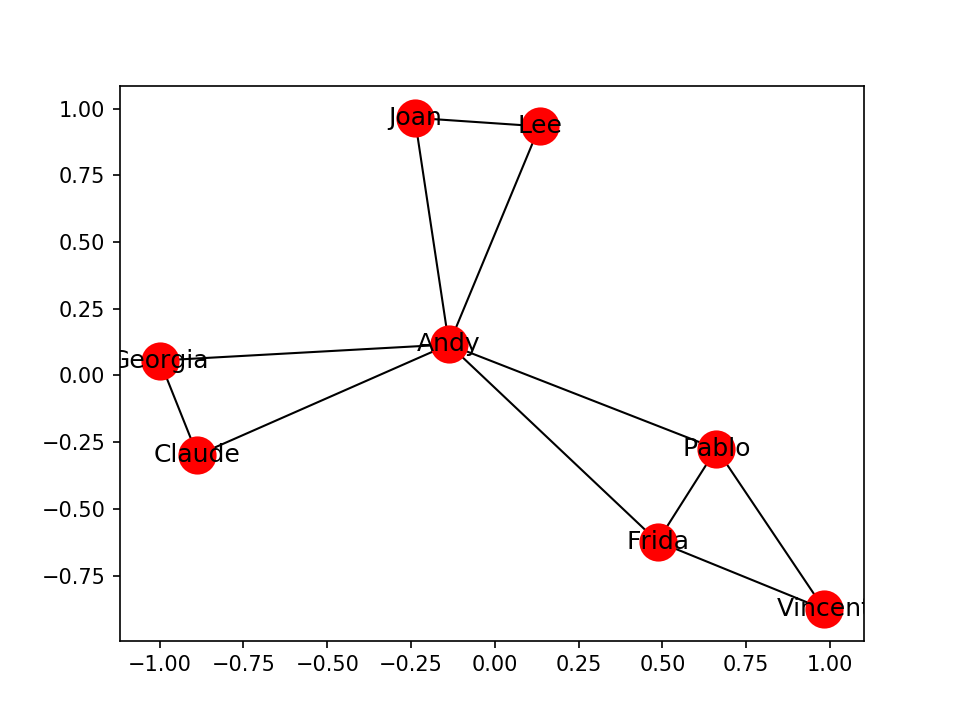

In [5]:
def step_three():
        
    #get the graph from step 2
    B = step_two()

    #create a projected graph
    weighted_proj = bipartite.weighted_projected_graph(B, employees)
    
    return weighted_proj
plot_graph(step_three())

### Step 4
I find out if people that have a high relationship score also like the same types of movies.

I find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it is treated as a 0, not a missing value, and is included in the correlation calculation.

*This function returns a float.*

In [6]:
def step_four():
        
    #create a network graph from the Employee_Relationships.txt
    Rel = nx.read_edgelist('Employee_Relationships.txt' ,data=[('relationship_score', int)])

    #create a pandas dataframe storing the edge information derived from the network graph
    Rel_df = pd.DataFrame(list(Rel.edges(data=True)), columns=['From', 'To', 'relationship_score'])

    #get the newtwork graph from question 3
    G = step_three()

    #create a pandas dataframe storing the edge information from the Q3 network graph
    G_df = pd.DataFrame(list(G.edges(data=True)), columns=['From', 'To', 'movies_score'])

    #create a copy 
    G_copy_df = G_df.copy()

    #in the copied data frame rename the columns to get the other direction
    G_copy_df.rename(columns={"From":"From1", "To":"From"}, inplace=True)
    G_copy_df.rename(columns={"From1":"To"}, inplace=True)

    #create a data frame unioning the df
    G_final_df = pd.concat([G_df, G_copy_df])

    #join that data frame with the relationship dataframe
    final_df = pd.merge(G_final_df, Rel_df, on = ['From', 'To'], how='right')

    #technically what is being stored in the dataframe in the movie_score and relationship_score is a dictionary
    #use the map function and a lambda to access the values in the dictionary
    ##if the movie_score is empty(i.e it would not be of type dictionary), replace with a None value
    final_df['movies_score'] = final_df['movies_score'].map(lambda x: x['weight'] if type(x)==dict else None)
    final_df['relationship_score'] = final_df['relationship_score'].map(lambda x: x['relationship_score'])

    #If two employees have no movies in common it should be treated as a 0
    final_df['movies_score'].fillna(value=0, inplace=True)

    #Calculate the correlation
    answer = final_df['movies_score'].corr(final_df['relationship_score'])

    return answer

In [7]:
step_four()

0.7883962221733473